# NAME : SAHIL TRIPATHI 



#### GITHUB  : https://github.com/sahil2128

#### LINKEDIN : https://www.linkedin.com/in/sahil-tripathi-5852b5184/

## TASK 1: Predict the percentage of an student based on the no. of study hours 

### This is a simple linear regression task as it involves just 2 variables.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.warn('my warning')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: my warning
  import sys


### Importing Dataset 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv",header=0)

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Dealing with first 5 rows 

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### To check the shape of Dataset 

In [6]:
df.shape

(25, 2)

### To Find info of Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### BOX PLOT

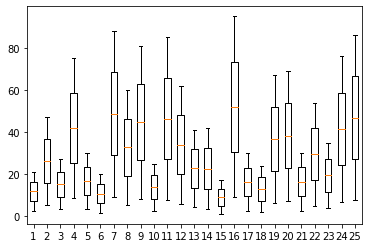

In [8]:
plt.boxplot(df)
plt.show()

### KDE PLOT

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


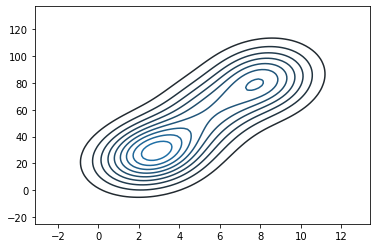

In [9]:
sns.kdeplot(df);

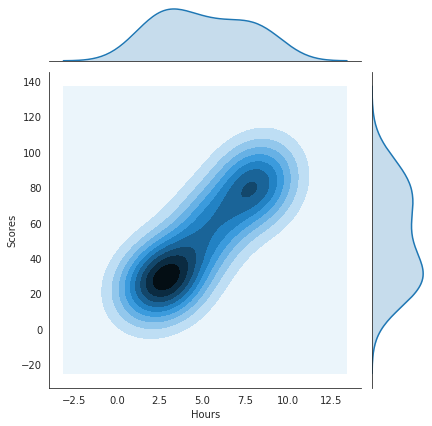

In [10]:
with sns.axes_style('white'):
    sns.jointplot("Hours", "Scores", df, kind='kde');

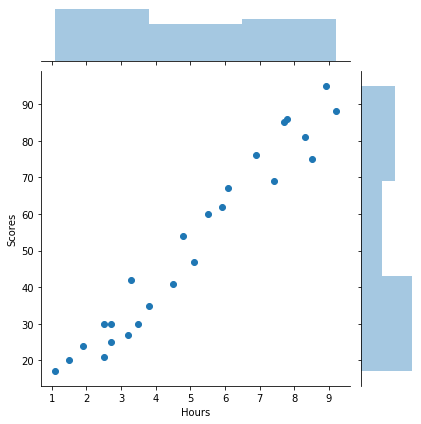

In [11]:
sns.jointplot(x='Hours', y='Scores', data=df)

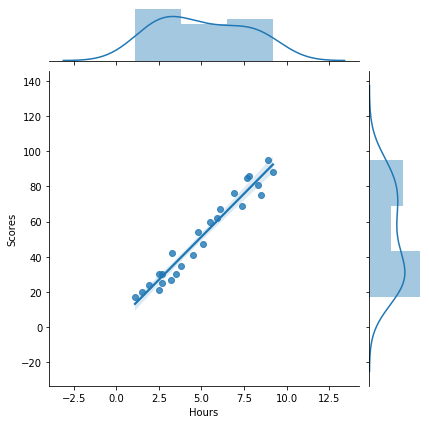

In [12]:
sns.jointplot("Hours", "Scores", df, kind='reg');

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### HEATMAP

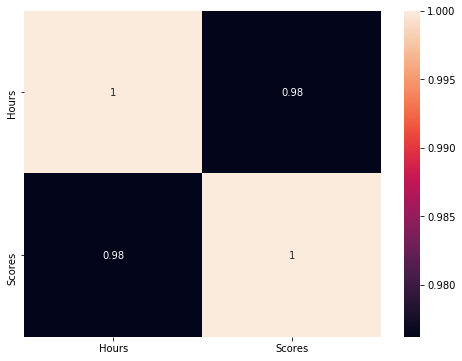

In [14]:
corre=df.corr()
plt.figure(figsize=(8,6))
#plt.show()
sns.heatmap(data=corre,annot=True)

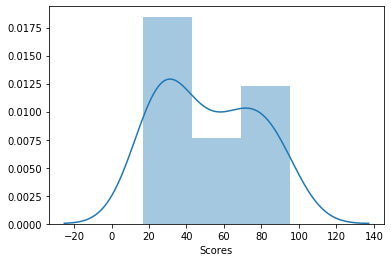

In [15]:
sns.distplot(df.Scores)

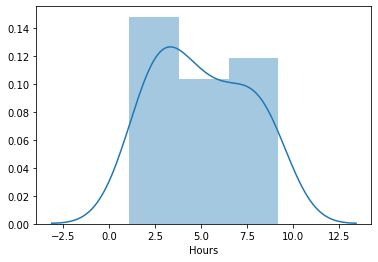

In [16]:
sns.distplot(df.Hours)

### OLS REGRESSION

In [17]:
import statsmodels.api as sn

In [18]:
X = sn.add_constant(df['Scores'])

In [19]:
lm = sn.OLS(df['Hours'], X).fit()

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           9.13e-17
Time:                        03:36:35   Log-Likelihood:                -19.914
No. Observations:                  25   AIC:                             43.83
Df Residuals:                      23   BIC:                             46.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0063      0.258     -0.024      0.981      -0.540       0.528
Scores         0.0975      0.005     21.583      0.000       0.088       0.107
==============================================================================
Omnibus:                        4.088   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.980
Skew:                           0.388   Prob(JB):                        0.372
Kurtosis:                       1.860   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Dividing Data into Features and Labels

In [21]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [22]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [23]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting training data & Testing Data 

In [24]:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualize model

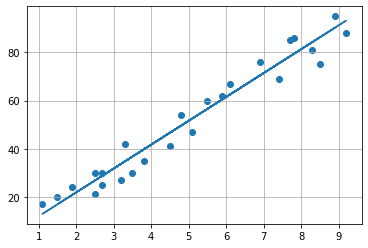

In [26]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line);
plt.grid()
plt.show()


In [27]:
y_pred = reg.predict(X_test)


In [28]:
act_pred = pd.DataFrame({'Target':y_test,'Predicted':y_pred})

In [29]:
act_pred

,Target,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [31]:
comp = pd.DataFrame({ 'Actual':[act_pred],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,Target Predicted 0 20 16.884145 1 ...,"[16.884144762398037, 33.73226077948984, 75.357..."


In [32]:
hours = pd.DataFrame({'study_hours': [9.25]})
unseenpred = reg.predict(hours)
print("No of Hours = {}".format(hours['study_hours'][0]))
print("Predicted Score = {}".format(unseenpred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
